<a href="https://colab.research.google.com/github/willRegen/AIWorkY2/blob/master/HandChar.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [140]:
pip install emnist

In [141]:
#@title Imports { form-width: "20%" }
from emnist import list_datasets
from emnist import extract_training_samples
from __future__ import division, print_function, unicode_literals
import numpy as np
import os
import string

def reset_graph(seed=42):
  tf.reset_default_graph()
  tf.set_random_seed(seed)
  np.random.seed(seed)

%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12
%tensorflow_version 1.x
import tensorflow as tf


In [172]:
def retData():
  data0, label0 = extract_training_samples('digits')
  data1, label1 = extract_training_samples('letters')
  #label1 = [x+9 for x in label1]
  label0 = [x+27 for x in label0] #was +25
  splitData(data1[0:6000], label1[0:6000])
  splitData(data0[0:2000], label0[0:2000])
  print("retrieved data" + " training size: " 
        + str(len(trainData)) + " testing size: " + str(len(testData)))
  
# def processData():
#   trainLabel = np.array(trainLabel, dtype=np.int32)
#   testLabel = np.array(testLabel, dtype=np.int32)
#   trainData = np.expand_dims(trainData,-1).astype(np.float32) / 255.0
#   stestData = np.expand_dims(testData,-1).astype(np.float32) / 255.0

def splitData(data, label):
    nSamples = len(label)
    trainData.extend(data[:round(.9*nSamples)])
    trainLabel.extend(label[:round(.9*nSamples)])
    testData.extend(data[round(.9*nSamples):])
    testLabel.extend(label[round(.9*nSamples):])

In [209]:
#decode = ['']
decode = []
decode.extend(string.ascii_lowercase)
decode.extend([0,1,2,3,4,5,6,7,8,9])#.extend(decode)

In [210]:
trainData = []
trainLabel= []
testData= []
testLabel = []
retData()

retrieved data training size: 7200 testing size: 800


In [211]:
endD = testData
X_train = np.expand_dims(trainData,-1).astype(np.float32) / 255.0
X_test = np.expand_dims(testData,-1).astype(np.float32) / 255.0
y_train = np.array(trainLabel,dtype=np.int32)
y_test = np.array(testLabel,dtype=np.int32)
split = int(len(X_train) * 0.1)
X_valid, X_train = X_train[:split], X_train[split:]
y_valid, y_train = y_train[:split], y_train[split:]

In [212]:


n_conv1 = 64 #does this start from ?64
n_hidden1 = 512 #number of nerurons in middle/ hidden layers
n_outputs = 37#36 #37#27#10 #outputs 36 (plus one then minus one) should be 35 wtf


reset_graph()
X = tf.placeholder(tf.float32, shape=(None, 28, 28, 1), name="X")
y = tf.placeholder(tf.int32, shape=(None), name="y") 

with tf.name_scope("dnn"):
    conv1 = tf.layers.conv2d(X, 
                             n_conv1, 
                             kernel_size = (7,7), 
                             strides=(3,3), 
                             name="conv1", 
                             activation=tf.nn.relu)
    
    pool1 = tf.layers.max_pooling2d(conv1, 
                                    pool_size=(4,4), 
                                    strides=(4,4))
    
    flatten = tf.layers.flatten(pool1)

    fc1 = tf.layers.dense(flatten, 
                          n_hidden1, 
                          name="fc1",
                          activation=tf.nn.relu)
    
    logits = tf.layers.dense(fc1, 
                             n_outputs, 
                             name="outputs")

In [213]:
with tf.name_scope("loss"):
    xentropy = tf.nn.sparse_softmax_cross_entropy_with_logits(labels=y, logits=logits)
    loss = tf.reduce_mean(xentropy, name="loss")

In [214]:
learning_rate = 0.08 #increased the learning rate

with tf.name_scope("train"):
    optimizer = tf.train.GradientDescentOptimizer(learning_rate)
    training_op = optimizer.minimize(loss)

In [215]:
with tf.name_scope("eval"):
    correct = tf.nn.in_top_k(logits, y, 1)
    accuracy = tf.reduce_mean(tf.cast(correct, tf.float32))

In [216]:
init = tf.global_variables_initializer()
saver = tf.train.Saver()

In [217]:
n_epochs = 20
batch_size = 50

In [218]:
def shuffle_batch(X, y, batch_size):
    rnd_idx = np.random.permutation(len(X))
    n_batches = len(X) // batch_size
    for batch_idx in np.array_split(rnd_idx, n_batches):
        X_batch, y_batch = X[batch_idx], y[batch_idx]
        yield X_batch, y_batch
        
with tf.Session() as sess:
    init.run()
    for epoch in range(n_epochs):
        for X_batch, y_batch in shuffle_batch(X_train, y_train, batch_size):
            sess.run(training_op, feed_dict={X: X_batch, y: y_batch})
        acc_batch = accuracy.eval(feed_dict={X: X_batch, y: y_batch})
        acc_valid = accuracy.eval(feed_dict={X: X_valid, y: y_valid})
        print(epoch, "Batch accuracy:", acc_batch, "Validation accuracy:", acc_valid)

    save_path = saver.save(sess, "./my_model_final.ckpt")

0 Batch accuracy: 0.36 Validation accuracy: 0.16944444
1 Batch accuracy: 0.72 Validation accuracy: 0.43055555
2 Batch accuracy: 0.78 Validation accuracy: 0.5236111
3 Batch accuracy: 0.78 Validation accuracy: 0.61388886
4 Batch accuracy: 0.84 Validation accuracy: 0.6180556
5 Batch accuracy: 0.86 Validation accuracy: 0.5875
6 Batch accuracy: 0.88 Validation accuracy: 0.6625
7 Batch accuracy: 0.86 Validation accuracy: 0.69166666
8 Batch accuracy: 0.86 Validation accuracy: 0.66805553
9 Batch accuracy: 0.84 Validation accuracy: 0.7027778
10 Batch accuracy: 0.88 Validation accuracy: 0.7013889
11 Batch accuracy: 0.9 Validation accuracy: 0.6888889
12 Batch accuracy: 0.94 Validation accuracy: 0.7361111
13 Batch accuracy: 0.86 Validation accuracy: 0.69861114
14 Batch accuracy: 0.9 Validation accuracy: 0.72083336
15 Batch accuracy: 0.92 Validation accuracy: 0.7416667
16 Batch accuracy: 0.88 Validation accuracy: 0.73333335
17 Batch accuracy: 0.94 Validation accuracy: 0.76805556
18 Batch accuracy: 

In [222]:
with tf.Session() as sess:
    saver.restore(sess, "./my_model_final.ckpt") # or better, use save_path
    X_new_scaled = X_test
    Z = logits.eval(feed_dict={X: X_new_scaled})
    y_pred = np.argmax(Z, axis=1)
    
# print("Predicted classes:", y_pred[:20])
# print("Actual classes:   ", y_test[:20])

INFO:tensorflow:Restoring parameters from ./my_model_final.ckpt


In [220]:
#plt.imshow(y_pred[0])
#print (x_test[2])
#print(x_pred[2])
#img=cNN.getTestData()[0]
#plt.imshow(img)


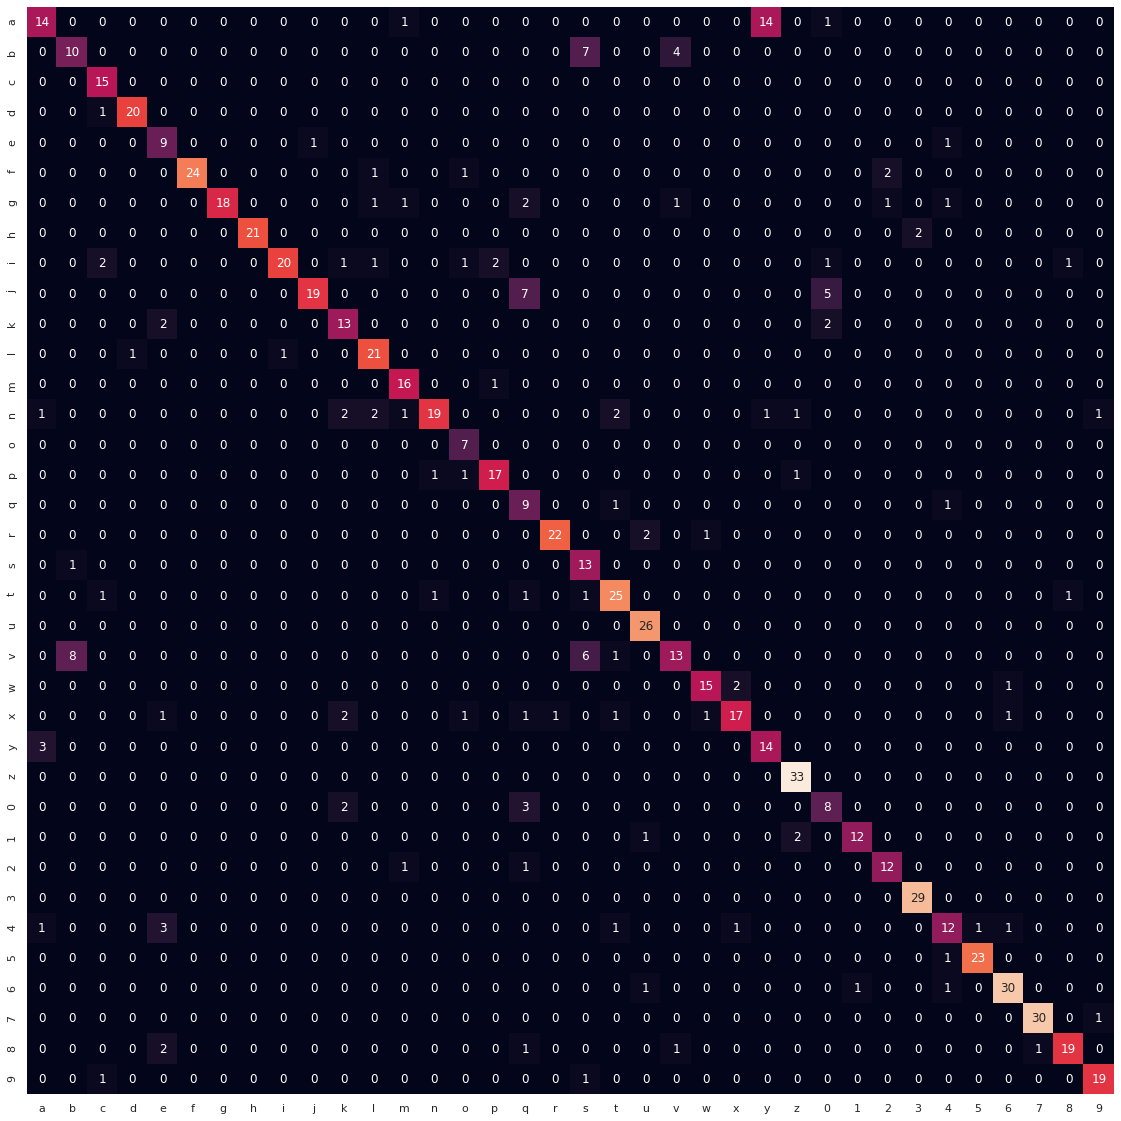

In [223]:
import seaborn as sns; sns.set()  # for plot styling
from sklearn.metrics import confusion_matrix
import string
dTest = []
dPred = []
x = 0
while x < len(y_pred):
  dPred.append(decode[y_pred[x]-1])
  dTest.append(decode[y_test[x]-1])
  x+=1
mat = confusion_matrix(dTest, dPred)
ax = plt.subplots(figsize=(20, 20))
ax = sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False, xticklabels=decode,
            yticklabels=decode)

o


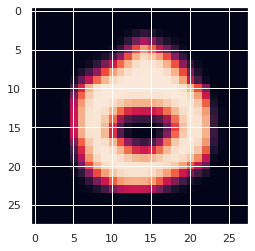

In [185]:
print(decode[y_test[1]-1]) #+1 or #-1
plt.imshow(endD[1])

In [186]:
%tensorflow_version 1.x
import tensorflow as tf
tf.__version__

'1.15.2'

In [196]:
trainData = []
trainLabel= []
testData= []
testLabel = []
retData()

endD = testData
X_train =  np.array(trainData,np.float32).reshape(-1, 28*28) / 255.0
X_test = np.array(testData,np.float32).reshape(-1, 28*28) / 255.0
y_train = np.array(trainLabel,dtype=np.int32)
y_test = np.array(testLabel,dtype=np.int32)
split = int(len(X_train) * 0.1)
X_valid, X_train = X_train[:split], X_train[split:]
y_valid, y_train = y_train[:split], y_train[split:]

retrieved data training size: 7200 testing size: 800


In [197]:
n_inputs = 28*28  # MNIST
n_hidden1 = 300
n_hidden2 = 100
n_outputs = 37 #10

In [198]:
reset_graph()
X = tf.placeholder(tf.float32, shape=(None, n_inputs), name="X")
y = tf.placeholder(tf.int32, shape=(None), name="y") 

with tf.name_scope("dnn"):
    hidden1 = tf.layers.dense(X, n_hidden1, name="hidden1",
                              activation=tf.nn.relu)
    hidden2 = tf.layers.dense(hidden1, n_hidden2, name="hidden2",
                              activation=tf.nn.relu)
    logits = tf.layers.dense(hidden2, n_outputs, name="outputs")
    y_proba = tf.nn.softmax(logits)

In [199]:
with tf.name_scope("loss"):
    xentropy = tf.nn.sparse_softmax_cross_entropy_with_logits(labels=y, logits=logits)
    loss = tf.reduce_mean(xentropy, name="loss")

In [200]:
learning_rate = 0.08
with tf.name_scope("train"):
    optimizer = tf.train.GradientDescentOptimizer(learning_rate)
    training_op = optimizer.minimize(loss)

In [201]:
with tf.name_scope("eval"):
    correct = tf.nn.in_top_k(logits, y, 1)
    accuracy = tf.reduce_mean(tf.cast(correct, tf.float32))

In [202]:
init = tf.global_variables_initializer()
saver = tf.train.Saver()

In [203]:
n_epochs = 15 #reduce
batch_size =75 #increase

In [204]:
def shuffle_batch(X, y, batch_size):
    rnd_idx = np.random.permutation(len(X))
    n_batches = len(X) // batch_size
    for batch_idx in np.array_split(rnd_idx, n_batches):
        X_batch, y_batch = X[batch_idx], y[batch_idx]
        yield X_batch, y_batch
        
with tf.Session() as sess:
    init.run()
    for epoch in range(n_epochs):
        for X_batch, y_batch in shuffle_batch(X_train, y_train, batch_size):
            sess.run(training_op, feed_dict={X: X_batch, y: y_batch})
        acc_batch = accuracy.eval(feed_dict={X: X_batch, y: y_batch})
        acc_valid = accuracy.eval(feed_dict={X: X_valid, y: y_valid})
        print(epoch, "Batch accuracy:", acc_batch, "Validation accuracy:", acc_valid)

    save_path = saver.save(sess, "./my_model_final.ckpt")

0 Batch accuracy: 0.49333334 Validation accuracy: 0.35416666
1 Batch accuracy: 0.61333334 Validation accuracy: 0.47083333
2 Batch accuracy: 0.73333335 Validation accuracy: 0.54305553
3 Batch accuracy: 0.70666665 Validation accuracy: 0.51944447
4 Batch accuracy: 0.7866667 Validation accuracy: 0.5541667
5 Batch accuracy: 0.82666665 Validation accuracy: 0.56805557
6 Batch accuracy: 0.7866667 Validation accuracy: 0.61388886
7 Batch accuracy: 0.84 Validation accuracy: 0.5847222
8 Batch accuracy: 0.9066667 Validation accuracy: 0.59305555
9 Batch accuracy: 0.8666667 Validation accuracy: 0.6125
10 Batch accuracy: 0.8666667 Validation accuracy: 0.6097222
11 Batch accuracy: 0.84 Validation accuracy: 0.6166667
12 Batch accuracy: 0.88 Validation accuracy: 0.6458333
13 Batch accuracy: 0.82666665 Validation accuracy: 0.6388889
14 Batch accuracy: 0.9066667 Validation accuracy: 0.62916666


In [205]:
with tf.Session() as sess:
    saver.restore(sess, "./my_model_final.ckpt") # or better, use save_path
    X_new_scaled = X_test
    Z = logits.eval(feed_dict={X: X_new_scaled})
    y_pred = np.argmax(Z, axis=1)
    
print("Predicted classes:", y_pred[:20])
print("Actual classes:   ", y_test[:20])

INFO:tensorflow:Restoring parameters from ./my_model_final.ckpt
Predicted classes: [26 15 23 10 10 33 10 24 10 24 11 24  4 29  6 26 16 13  9 22]
Actual classes:    [26 15 23 10 10 10 10 24  9 24 11 24 21  7  6 26 16 13  9 22]


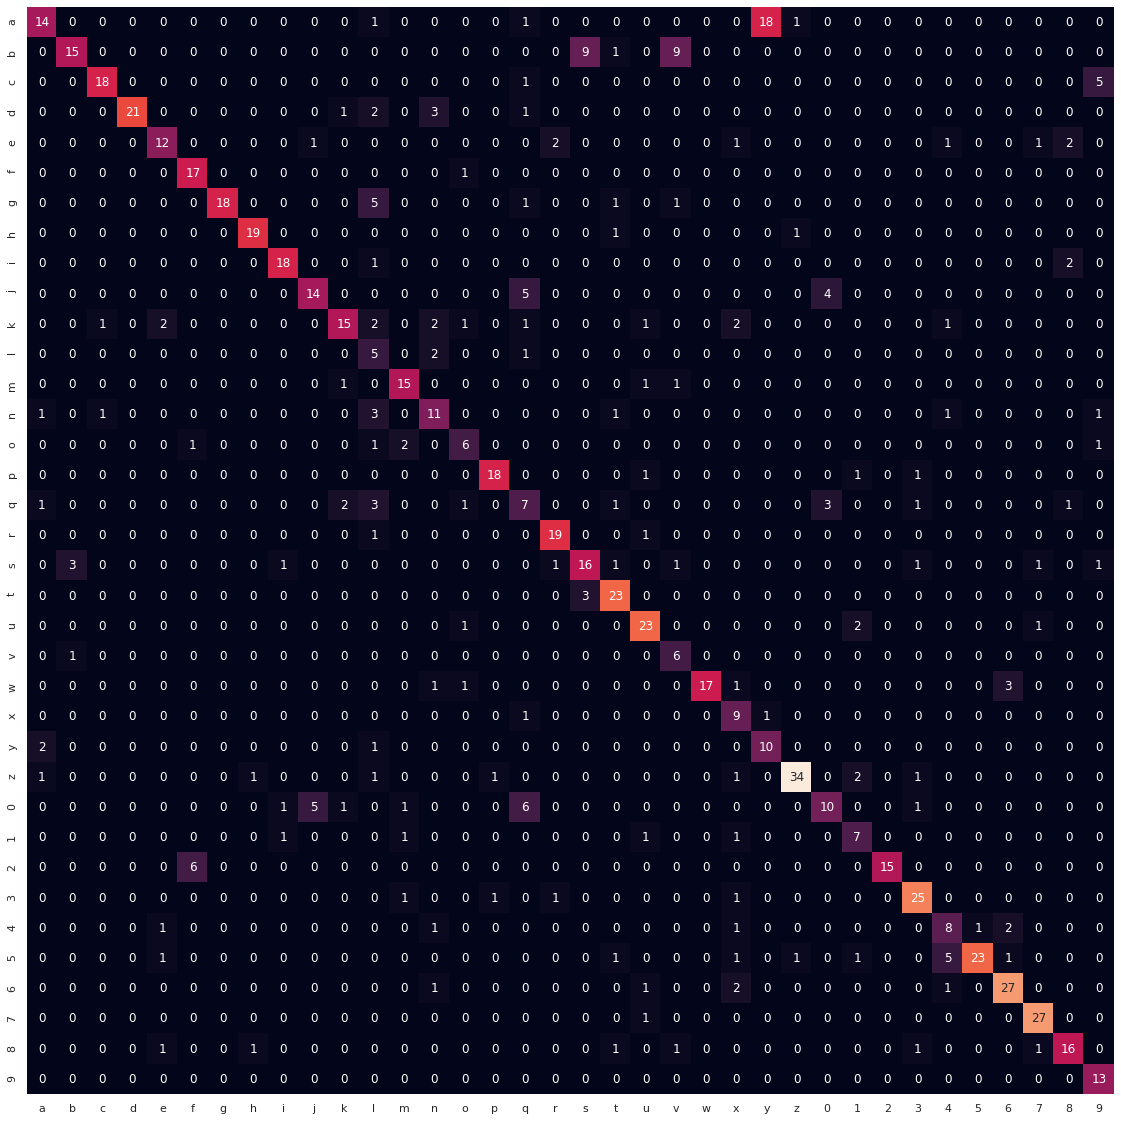

In [207]:
import seaborn as sns; sns.set()  # for plot styling
from sklearn.metrics import confusion_matrix
import string
dTest = []
dPred = []
x = 0
while x < len(y_pred):
  dPred.append(decode[y_pred[x]-1])
  dTest.append(decode[y_test[x]-1])
  x+=1
mat = confusion_matrix(dTest, dPred)
ax = plt.subplots(figsize=(20, 20))
ax = sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False, xticklabels=decode,
            yticklabels=decode)

z


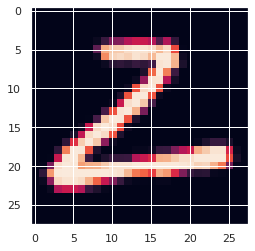

In [208]:
print(decode[y_test[0]-1]) #+1 or #-1
plt.imshow(endD[0])

26
0.0
0.0


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1515: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  average, "true nor predicted", 'F-score is', len(true_sum)
